# Homework 3

Name : Raymond Visconti 

In [41]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.gaussian_process

# ML imports--tensorflow or pytorch
# Note! We will be using a Keras-provided dataset,
# so you may need to have tensorflow installed to get them
# even if you use pytorch for the ML application
import tensorflow as tf



# Problem 1 (25 points)

Building on last assignment, you should be thinking more about a concrete data set for the final project, as well as analysis methods. In 1-2 paragraphs, discuss the following questions:
* What dataset are you analyzing? Please point to a specific dataset, preferably at a public link. If you need to make the data yourself, use a self-hosting service like Google Drive or Dropbox to provide a link, or share the file with me via email or Canvas.
* What specific method are you planning to use to analyze your data? If you do not have a specific method, what kind of question (regression, correlation, classification, etc.) are you trying to answer?
* What method would you not use? Why is this method not a good choice for your dataset?
* What plots or figures are you planning on making for the final project? Note that visualization is a key part of the final project, and you should be able to convey your results using charts or plots.

Names : Raymond Visconti,
        Bryce Forrest 

Our group is analyzing trends in Spotify playlist data through combining the Spotify Million Playlist Dataset and joining it on Spotify 1.2M+ Songs dataset to allow us access to the metadata of songs in Spotify playlist. The links are, respectively, https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge#dataset and https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs (I apologize that the Million Playlists Dataset requires an account with AIcrowd, but there is a sample of the dataset on the landing page of the link... we can provide a sample of the absolutely behemoth dataset to you as needed).

We discussed a few approaches to analyzing the data, and have settled on a plan of attack.

For a given playlist, there is a distribution of values for each feature in the metadata. It would be interesting to see if these distributions are often "nice" and follow some obvious pattern. If so, can we predict whether a song belongs in a particular playlist (i.e. "recommend a song") based on which confidence interval it falls in across each distribution for each feature? This approach does not rely on any fancy machine learning, so it will be interesting to see how it stacks up against the other approaches.

Another approach for analyzing playlists is through clustering, and making predictions of good "recommendations" (likely analyzed by removing a song from the playlist and measuring some sort of recommendation score) through some kind of nearest-neighbor/nearest-centroid/cosine similarity sort of approach. These clusters would again be based on the metadata for the playlists.

The final approach, which does not utilize the metadata, is through the construction of a binary playlist-song matrix, made up of rows of playlists and columns of songs, with a 1 at index $ij$ if song $i$ is in playlist $j$, and zero otherwise. Matrix factorization (SVD and others) can be used for an approach called collaborative filtering, which relies on latent features between songs and users to make recommendations. This method is known to be highly effective, so it will be interesting to compare it to the other approaches. Furthermore, to analyze the latent playlist matrix and latent song matrix, and compare any clusters between songs in the latent song matrix to clusters in the song metadata.

The Million Playlist Dataset webpage lists a few quantitative measures for analyzing recommendations, which we will use to compare each approach (R-precision, NDCG).

This problem seems to be a classification problem more than anything, though without an obvious correct "label." Again, for this reason, it will be useful to remove a song from a playlist it is actually in and measure whether it is considered a good "recommendation" for the playlist (which it obviously should be).

It may go without saying, but there are obviously infinitely many ways one should not approach this problem. It's hard to imagine how any sort of curve-fitting or regression could be applied (there is no concept of "time" or any other x-axis that would make sense to link each instance of the metadata to the next). And while neural networks are good for discovering hidden features in data, we are hesitant to apply it here, due to the unbelievable size of the data, training on any significant portion of it will require significant compute power and time. Still, if time allows, it may be interested to measure the performance of a neural network trained on a very small percentage of the data, but I'm not confident any small partition of the data could form a meaningful representation of the whole (I would be so happy to be proven wrong about that).

As far as plots go, we obviously will have to include some histograms of the distributions of the metadata features, whether of all the playlists or just a few to show variance between them remains to be seen. Any time clustering is applied, it's also an obvious plot to include (who doesn't love a satisfying cluster with clear demarkation of classes?). I also think describing collaborative filtering benefits from visual aids / diagrams / cute little clip art describers, so those will likely also be utilized here.

# Problem 2: Back propagation (25 points)
Suppose we have a relatively simple neural network: an input layer $x$ with $n$ values/neurons, a hidden layer $y$ with $m$ neurons, and 1 output neuron $z$. Assume that each of the layers are dense/fully connected layers, and the output of the hidden layer $y$ uses the sigmoid activation function $\sigma$:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}.
$$
Also assume that we are using a mean-square error (MSE) loss function, which quantifies the difference between the output neuron $z_0$ and the true value $z_\mathrm{true}$ as:
$$
L(z_0, z_\mathrm{true}) = (z_0 - z_\mathrm{true})^2.
$$

## a. (10 points)
Derive an expression for the back propagation term for each type of weight or bias in the neural network:
1. a weight $W_{ij}^{(1)}$ in the dense layer connecting $y$ and $z$,
1. the bias $b_i^{(1)}$ for the dense layer connecting $y$ and $z$,
1. a weight $W_{ij}^{(0)}$ in the dense layer connecting $x$ and $y$,
1. a bias $b_i^{0}$ for the dense layer connecting $x$ and $y$.

Your expressions should involve only terms that have specific values, i.e., you should not have any symbolic derivatives in your expressions. Note that we have introduced the notation $W_{ij}^{(k)}$ and $b_i^{(k)}$ to denote weights and biases in the dense layer $k$.

![a](/Users/raymondvisconti/Documents/cs489/ast03/IMG_2669.jpg)

![a](/Users/raymondvisconti/Documents/cs489/ast03/IMG_2671.jpg)

## b. (5 points)
Write an expression for the overall gradient of the loss function $\nabla L$. Again, you should only include specific values, but you may use summation notation to express the sum over the $n$ neurons in the input layer $x$ and the $m$ neurons in the hidden layer $y$.

## c. (10 points)
Show that if all weights and biases are initialized with values of 0, some of the terms in your expression are equal. Which terms are equal? (_N.B._: this is why neural networks are initialized with random numbers!)

![Alt text](IMG_2672.jpg)

# Problem 3: Training neural networks (40 points)
For this problem we will be using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). The data consist of 50,000 training images that are 32x32 pixels, with 3 color channels, and belong to 1 of 10 categories. There are also 10,000 test images.

## a. (5 points)
Read the data in and combine them into a single dataset/series of labels that are length 60,000. The data are available in `tensorflow.keras.datasets`, or from the website linked above. (_Hint_: if you use the data from TensorFlow, you will be default get already-separated train and test data. You will need to combine them together using NumPy functions. The final shape of your x (input) data should be `(60000, 32, 32, 3)`, and the final shape of your y (label) data should be `(60000, 1)`).

In [42]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Combine the training and test sets
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

# Assert the shapes
assert x_data.shape == (60000, 32, 32, 3)
assert y_data.shape == (60000, 1)

## b. (5 points)
Pre-process the data and labels. The data have values between 0-255. Normalize them to have values between 0 and 1. Also, because this is a classification problem, you will need to build one-hot encodings for the labels (like we did for the MNIST dataset).

In [43]:
# Normalize
x_data_renorm = x_data / 255

# One hot 
y_data_encoded = to_categorical(y_data, num_classes=10)

# Ensure normalization and encoding 
assert x_data_renorm.shape == (60000, 32, 32, 3)
assert y_data_encoded.shape == (60000, 10)

## c. (5 points)
Make a plot of the first 25 images in the test dataset, along with the (human-meaningful) label of what class they belong to.

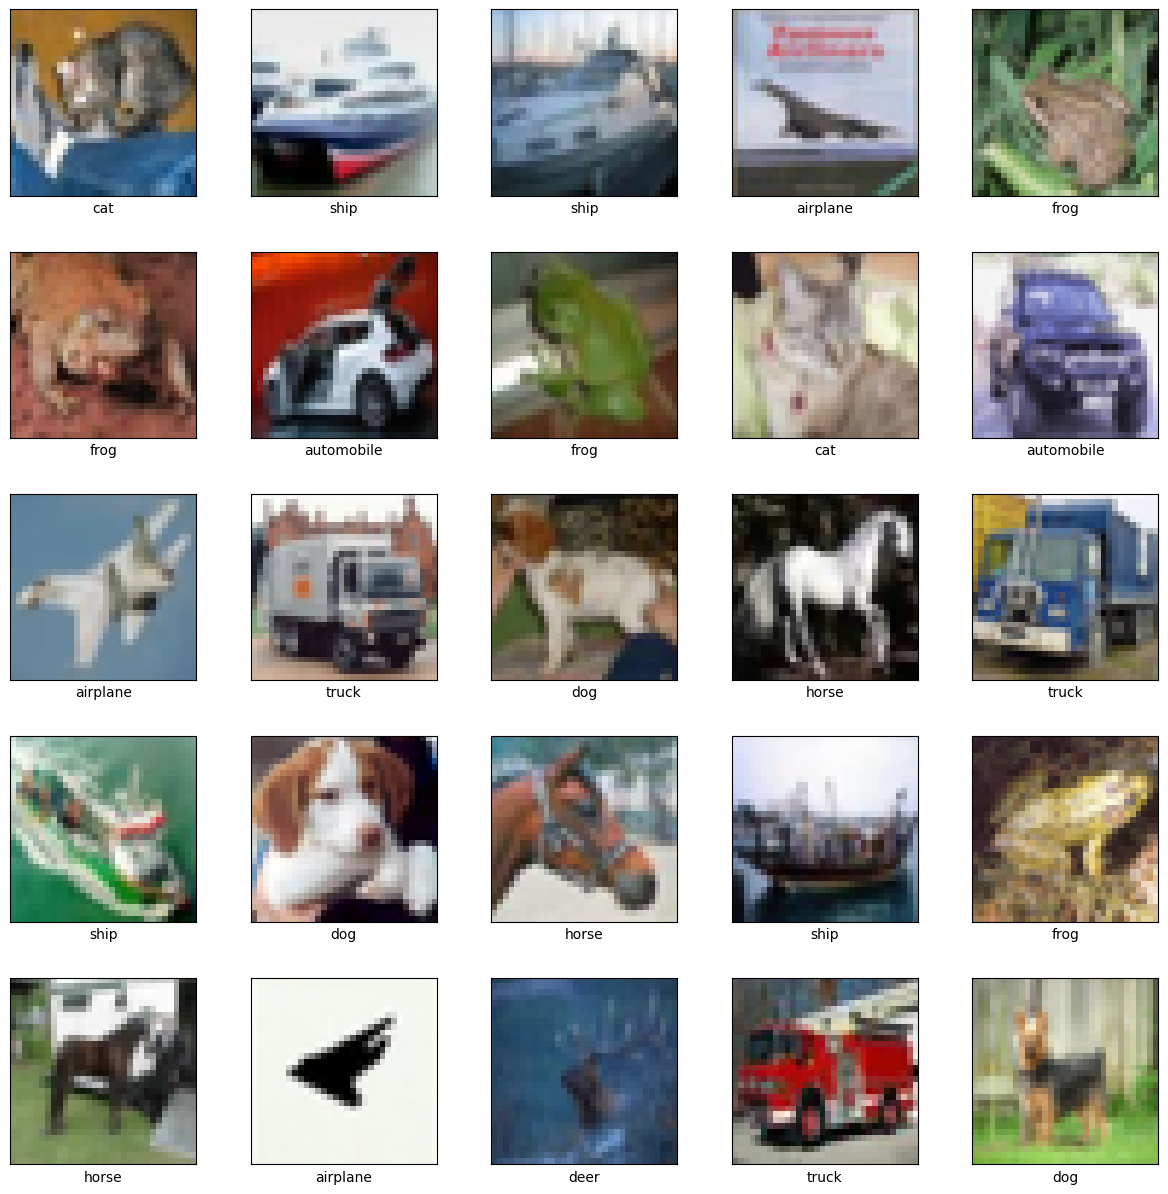

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Show ith test image
    label_index = y_test[i][0]  # Get label index 
    plt.xlabel(class_names[label_index]) 

plt.subplots_adjust(hspace=0.3)
plt.show()

## d. (10 points)
Design an implement a neural network for classifying the input data. Begin by using a series of dense (fully connected) layers, with a ReLU activation function. Compile the network with a metric of `"accuracy"`, and a loss function that is appropriate for classification problems.

In [45]:
model = Sequential()

# Flatten the input data
model.add(Flatten(input_shape=(32, 32, 3)))

# Add dense layers with ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## e. (5 points)
Perform $k$-fold cross-validation using 5 different train/validate/test splits. In each case, use 70% of the data for training, 10% for validation, and 20% for testing. Save the `history` from each of the validations in a dictionary. (_Note_: you do not need to train for more than 50 epochs for each fold. This is a complicated dataset, and getting high accuracy is non-trivial!)

In [46]:
from sklearn.model_selection import KFold

# # of folds 
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Dictionary to store results
results_dict = {}

# Loop through each fold
for i, (train_index, test_index) in enumerate(kf.split(x_data_renorm)):
    # Split data into train+validation and test
    x_train_val, x_test = x_data_renorm[train_index], x_data_renorm[test_index]
    y_train_val, y_test = y_data_encoded[train_index], y_data_encoded[test_index]


    train_val_split = int(len(x_train_val) * 0.875)  # 70% of total data
    x_train, x_validate = x_train_val[:train_val_split], x_train_val[train_val_split:]
    y_train, y_validate = y_train_val[:train_val_split], y_train_val[train_val_split:]

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_validate, y_validate))

    # Add to dictionary
    results_dict[f"fold_{i}"] = history.history


Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.8742 - accuracy: 0.3213 - val_loss: 1.7775 - val_accuracy: 0.3577
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.6984 - accuracy: 0.3898 - val_loss: 1.6471 - val_accuracy: 0.4020
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.6310 - accuracy: 0.4167 - val_loss: 1.5903 - val_accuracy: 0.4197
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.5808 - accuracy: 0.4348 - val_loss: 1.5830 - val_accuracy: 0.4252
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.5425 - accuracy: 0.4484 - val_loss: 1.5405 - val_accuracy: 0.4545
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 1.5219 - accuracy: 0.4564 - val_loss: 1.6079 - val_accuracy: 0.4282
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.5032 - accuracy: 0.4609 - val_loss: 1.5336 - val_accuracy:

## f. (5 points)
Plot the accuracy and loss values for each of your folds as a function of epoch. Based on these plots, does it seem that your network is overfitting the data?

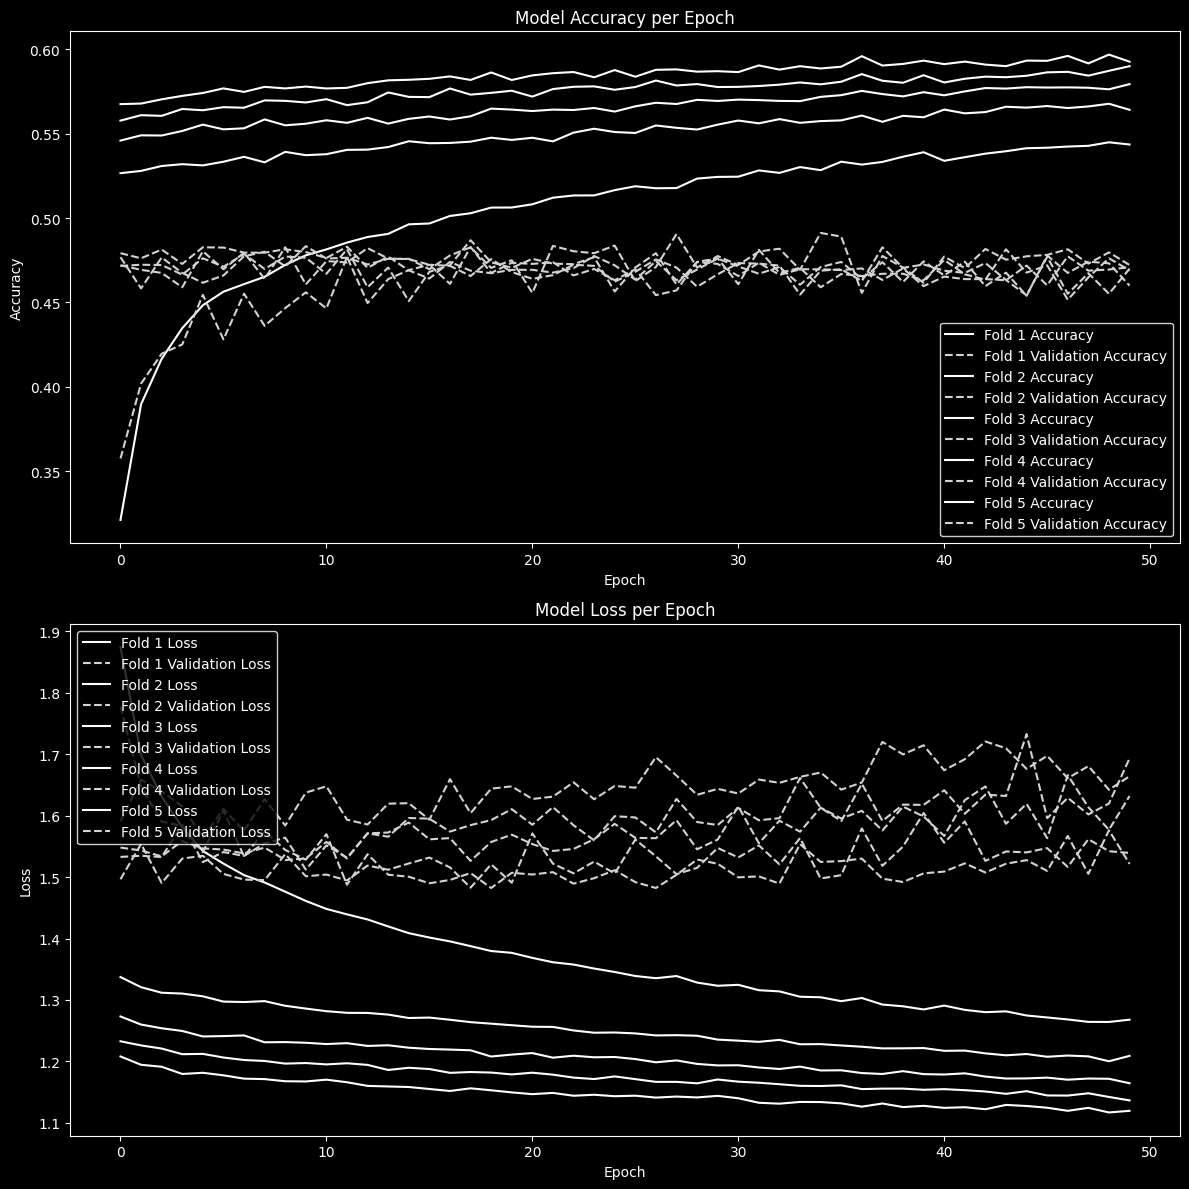

In [47]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Set black background color for the entire figure
fig.patch.set_facecolor('black')

# Function to style each axis
def style_ax(ax, title, ylabel, xlabel):
    ax.set_facecolor('black')  # Set the background color of the plot
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    for spine in ax.spines.values():
        spine.set_color('white')

# Plot accuracy for ax1
style_ax(ax1, 'Model Accuracy per Epoch', 'Accuracy', 'Epoch')
for i in range(5):
    ax1.plot(range(num_epochs), results_dict[f"fold_{i}"]['accuracy'], label=f'Fold {i+1} Accuracy', color='white')
    ax1.plot(range(num_epochs), results_dict[f"fold_{i}"]['val_accuracy'], label=f'Fold {i+1} Validation Accuracy', linestyle='dashed', color='lightgray')
ax1.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Same for ax2
style_ax(ax2, 'Model Loss per Epoch', 'Loss', 'Epoch')
for i in range(5):
    ax2.plot(range(num_epochs), results_dict[f"fold_{i}"]['loss'], label=f'Fold {i+1} Loss', color='white')
    ax2.plot(range(num_epochs), results_dict[f"fold_{i}"]['val_loss'], label=f'Fold {i+1} Validation Loss', linestyle='dashed', color='lightgray')
ax2.legend(facecolor='black', edgecolor='white', labelcolor='white')

plt.tight_layout()
plt.show()


## g. (5 points)
Repeat parts (c), (d), and (e), but using a convolutional neural network (i.e., include convolutional layers like `Conv2D`). Try to achieve a validation accuracy >= 75%. (_Hint_: You should find that the accuracy of your results improves when adding convolutional layers. If not, then you may have to play around with the architecture, or add regularization layers. Don't give up! The CIFAR-10 dataset is more complicated than MNIST, so the networks will have to be more complicated than what we covered in class, but good results are possible!)

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Re-initialize the model
model = tf.keras.models.Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flattening the output for the dense layer
model.add(Flatten())

# Dense layers with dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

results_dict_cnn = {}  # Dictionary to store results for CNN

for i, (train_index, test_index) in enumerate(kf.split(x_data_renorm)):
    # Re-initialize the model for each fold
    # Define the CNN model here (same as the one defined above)

    # Train 
    history_cnn = model.fit(x_train, y_train, epochs=50, validation_data=(x_validate, y_validate))

    # Store in dictionary
    results_dict_cnn[f"fold_{i}"] = history_cnn.history


Epoch 1/50
1313/1313 [==============================] - 14s 10ms/step - loss: 1.7946 - accuracy: 0.3340 - val_loss: 1.4349 - val_accuracy: 0.4813
Epoch 2/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.4622 - accuracy: 0.4713 - val_loss: 1.2488 - val_accuracy: 0.5567
Epoch 3/50
1313/1313 [==============================] - 14s 10ms/step - loss: 1.3234 - accuracy: 0.5293 - val_loss: 1.2303 - val_accuracy: 0.5485
Epoch 4/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.2396 - accuracy: 0.5609 - val_loss: 1.1306 - val_accuracy: 0.5922
Epoch 5/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.1795 - accuracy: 0.5829 - val_loss: 1.0752 - val_accuracy: 0.6177
Epoch 6/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.1176 - accuracy: 0.6051 - val_loss: 1.0348 - val_accuracy: 0.6332
Epoch 7/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.0740 - accuracy: 0.6239 - val_loss: 1.0435 -

# Problem 4: Gaussian Process Regression (10 points)
Let us revisit some of the data from HW2, and fit it using a different method. This time, we will use the Gaussian Process Regression (GPR) technique.

## a. (5 points)
Read in the data `problem2.txt`. Note that as before, the columns are: $x$-values, $y$-values, and associated uncertainties $\sigma_y$. Perform a fit using `sklearn.gaussian_process.GaussianProcessRegressor`, which incorporates the uncertainties.

In [48]:
mydata = np.loadtxt('problem2.txt')
xvals = mydata[:, 0]
yvals = mydata[:, 1]
yerr = mydata[:, 2]

# Kernel
kernel = ConstantKernel() * RBF()

# Gaussian model 
gp = GaussianProcessRegressor(kernel=kernel, alpha=yerr**2)

# Fit model
gp.fit(xvals[:, None], yvals)


GaussianProcessRegressor(alpha=array([6.5672871 , 7.63984832, 1.34878439, 5.35552503, 3.74228389,
       8.81551431, 3.67214994, 2.92317388, 6.65041769, 1.61458566,
       7.99071855, 2.61482598, 7.04779605, 4.55322929, 5.4890976 ,
       5.34431657, 1.31938828, 1.23495959, 4.75863437, 1.59559722,
       2.66575293, 5.94896201, 2.06443022, 7.82364578, 7.99068139,
       5.77712506, 6.27909309, 7.07742138, 3.66119386, 1.40573113]),
                         kernel=1**2 * RBF(length_scale=1))

## b. (5 points)
Plot the result of the fit $\pm 2\sigma$ uncertainty over the interval $-3 \leq x \leq 3$, along with the input data and uncertainty. How does it compare with the cubic model made via linear least squares fitting you did last time?

Also compute the score for the fit. Does the fit look reasonable to you?

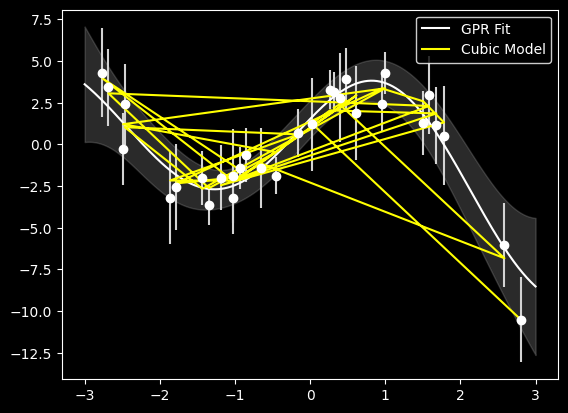

In [50]:
xfit = np.linspace(-3, 3, num=1000)
yfit, yfit_err = gp.predict(xfit[:, None], return_std=True)

# Create the figure and the axes
fig, ax = plt.subplots()

# Set the background color of the figure and the axes
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

for spine in ax.spines.values():
    spine.set_color('white')

# Contrasting color plot :)
ax.errorbar(xvals, yvals, yerr=yerr, fmt='o', color='white', ecolor='lightgray')

ax.plot(xfit, yfit, label='GPR Fit', color='white')


ax.fill_between(xfit, yfit - 2 * yfit_err, yfit + 2 * yfit_err, alpha=0.2, color='lightgray')

Amat = np.column_stack((np.ones_like(xvals), xvals, xvals**2, xvals**3))
b = yvals
result = scipy.optimize.lsq_linear(Amat, b, bounds=(-np.inf, np.inf))
cubic_model = Amat @ result.x


ax.plot(xvals, cubic_model, label='Cubic Model', color='yellow')

ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

plt.show()



In [6]:
score = gp.score(xvals[:, None], yvals)
print("Fit score: ", score)

ax.legend()
plt.show()

Score of the fit: 0.8884822194893367
